In [52]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [53]:
data=pd.read_csv("C:\\Users\\lingas\\Downloads\\loan-train (1).csv")

In [54]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [55]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [56]:
data.shape

(614, 13)

In [57]:
print("Number of Rows:",data.shape[0])
print("Number of Columns:",data.shape[1])

Number of Rows: 614
Number of Columns: 13


In [58]:
data["LoanAmount(in Dollars)"]=data["LoanAmount"]

In [59]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount(in Dollars)
count,614.000000,614.000000,592.000000,600.00000,564.000000,592.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,146.412162
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,85.587325
min,150.000000,0.000000,9.000000,12.00000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,100.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,128.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,168.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,700.000000


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  601 non-null    object 
 2   Married                 611 non-null    object 
 3   Dependents              599 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           582 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              592 non-null    float64
 9   Loan_Amount_Term        600 non-null    float64
 10  Credit_History          564 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status             614 non-null    object 
 13  LoanAmount(in Dollars)  592 non-null    float64
dtypes: float64(5), int64(1), object(8)
memory 

In [61]:
data.isnull().sum()

Loan_ID                    0
Gender                    13
Married                    3
Dependents                15
Education                  0
Self_Employed             32
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                22
Loan_Amount_Term          14
Credit_History            50
Property_Area              0
Loan_Status                0
LoanAmount(in Dollars)    22
dtype: int64

In [62]:
data.drop(columns=["Loan_ID","Loan_Amount_Term","LoanAmount"],inplace=True)

In [63]:
data["Dependents"]=data["Dependents"].replace(to_replace="3+",value='4')

In [64]:
data["LoanAmount(in Dollars)"].mean(skipna=True)

146.41216216216216

In [65]:
data['Gender'].mode()[0]

'Male'

In [66]:
data['Married'].mode()[0]

'Yes'

In [67]:
data['Dependents'].mode()[0]

'0'

In [68]:
data['Self_Employed'].mode()[0]

'No'

In [69]:
data['Credit_History'].mode()[0]

1.0

In [70]:
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
data['Married']=data['Married'].fillna(data['Married'].mode()[0])
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mode()[0])
data["LoanAmount(in Dollars)"]=data["LoanAmount(in Dollars)"].fillna(data["LoanAmount(in Dollars)"].mean(skipna=True))

In [71]:
data.isnull().sum()

Gender                    0
Married                   0
Dependents                0
Education                 0
Self_Employed             0
ApplicantIncome           0
CoapplicantIncome         0
Credit_History            0
Property_Area             0
Loan_Status               0
LoanAmount(in Dollars)    0
dtype: int64

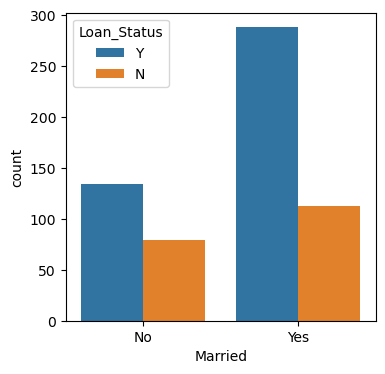

In [72]:
plt.figure(figsize=(4,4))
sns.countplot(x=data["Married"],hue=data["Loan_Status"])
plt.show()

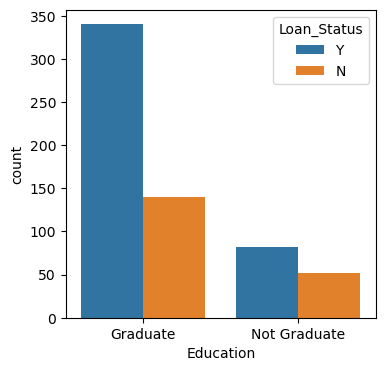

In [73]:
plt.figure(figsize=(4,4))
sns.countplot(x=data["Education"],hue=data["Loan_Status"])
plt.show()

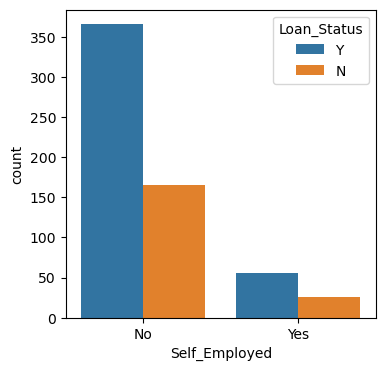

In [74]:
plt.figure(figsize=(4,4))
sns.countplot(x=data["Self_Employed"],hue=data["Loan_Status"])
plt.show()

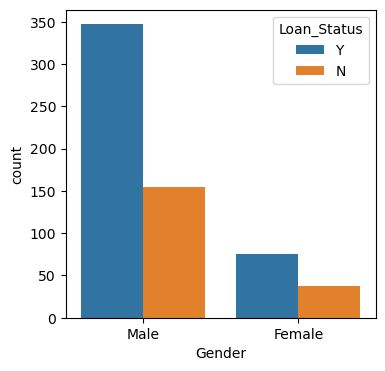

In [75]:
plt.figure(figsize=(4,4))
sns.countplot(x=data["Gender"],hue=data["Loan_Status"])
plt.show()

In [76]:
data['Credit_History']=data['Credit_History'].astype(int)

In [77]:
data['Dependents']=data['Dependents'].astype(int)

In [78]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [79]:
data['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [80]:
data['Dependents'].unique()

array([0, 1, 2, 4])

In [81]:
data['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [82]:
data["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [83]:
data["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

In [84]:
data.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Credit_History,Property_Area,Loan_Status,LoanAmount(in Dollars)
299,Male,Yes,1,Graduate,No,2014,2925.0,1,Urban,N,113.000000
142,Male,No,0,Graduate,Yes,6950,0.0,1,Semiurban,Y,175.000000
35,Male,Yes,0,Graduate,No,2275,2067.0,1,Urban,Y,146.412162
589,Male,Yes,2,Graduate,Yes,2726,0.0,0,Semiurban,N,106.000000
411,Male,Yes,0,Graduate,No,6256,0.0,1,Urban,Y,160.000000


In [85]:
label=LabelEncoder()

In [86]:
#0->female 1->male
data["Gender"]=label.fit_transform(data.Gender)

#Married 0->no 1-> yes
data["Married"]=label.fit_transform(data.Married)

#education 0->graduate 1->non_graduate
data["Education"]=label.fit_transform(data.Education)

#self emplpoyed 0-> no 1->yes
data["Self_Employed"]=label.fit_transform(data.Self_Employed)

#property_area  2->urban  0->rural   1->semi_urbann
data["Property_Area"]=label.fit_transform(data.Property_Area)
#loan_status 0->no 1->yes
data["Loan_Status"]=label.fit_transform(data.Loan_Status)

In [87]:
data["Property_Area"].unique()

array([2, 0, 1])

In [88]:
data['Self_Employed'].unique()

array([0, 1])

In [89]:
data["Gender"].unique()

array([1, 0])

In [90]:
data["Education"].unique()

array([0, 1])

In [91]:
data['Credit_History'].unique()

array([1, 0])

In [92]:
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome','LoanAmount(in Dollars)']

In [93]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data[numerical_cols]=scaler.fit_transform(data[numerical_cols])

In [94]:
x=data.drop(columns='Loan_Status')
y=data["Loan_Status"]

In [95]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Credit_History,Property_Area,Loan_Status,LoanAmount(in Dollars)
0,1,0,0,0,0,0.072991,-0.554487,1,2,1,0.000000
1,1,1,1,0,0,-0.134412,-0.038732,1,0,0,-0.219273
2,1,1,0,0,1,-0.393747,-0.554487,1,2,1,-0.957641
3,1,1,0,1,0,-0.462062,0.251980,1,2,1,-0.314547
4,1,0,0,0,0,0.097728,-0.554487,1,2,1,-0.064454


In [102]:
data.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Credit_History,Property_Area,Loan_Status,LoanAmount(in Dollars)
567,1,1,4,0,0,-0.328217,0.300545,0,0,0,-0.278819
582,0,1,0,0,0,-0.366552,-0.554487,1,1,1,-1.314916
83,1,1,0,0,0,0.097728,0.215042,1,1,0,1.412281
225,1,1,0,0,0,-0.352791,-0.554487,1,0,0,0.280911
408,1,1,1,0,0,0.474527,-0.554487,0,1,0,0.066546


In [96]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [97]:
model_df={}
def model_val(model,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=13)
    
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    result=accuracy_score(y_test,y_pred)
    print(f"{model} accuracy score is {result*100}")
    score=cross_val_score(model,x,y,cv=10)
    print(f"{model} average cross_val_score is {np.mean(score)}")
    model_df[model]=round(np.mean(score)*100,2)
                                 

In [98]:
model_df

{}

In [99]:
model=linear_model.LogisticRegression()
model_val(model,x,y)

LogisticRegression() accuracy score is 85.71428571428571
LogisticRegression() average cross_val_score is 0.8079587519830775


In [100]:
import pickle

In [101]:
pickle.dump(model,open('loanapproval.pkl','wb'))